In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
###### CRISPR sample

!gdown 1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
!gdown 1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS

### To make thinngs faster for the student, here is the indexed mouse genome, mm10.
### You have to donwload it and decompressed it, you will get both the fasta and the BWT'ed files. Note all have same prefix Mouse<.files>.
### Next semester we will cover how specialized computers are often used to solve this aligmnet problems faster.

!gdown 1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar

Downloading...
From (original): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
From (redirected): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO&confirm=t&uuid=4590e154-1107-4518-86c5-724fcaed1335
To: /content/CRISPR.R1.fastq
100% 2.67G/2.67G [00:27<00:00, 98.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS
From (redirected): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS&confirm=t&uuid=96e228fd-dcd9-4bd8-bd8f-7c5d2a613244
To: /content/CRISPR.R2.fastq
100% 2.67G/2.67G [00:32<00:00, 81.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar
From (redirected): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar&confirm=t&uuid=2c5c7e71-ed56-4892-b39e-448d896b7252
To: /content/MM10.tar.gz
100% 3.91G/3.91G [00:38<00:00, 101MB/s]


In [ ]:
!apt install bwa
!apt install samtools
!apt install bcftools
!apt-get update
!apt-get install -y seqtk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bwa is already the newest version (0.7.17-6).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
samtools is already the newest version (1.13-4).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bcftools is already the newest version (1.13-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InReleas

In [ ]:
!tar -xvzf MM10.tar.gz

MM10/
MM10/Mouse.sa
MM10/Mouse.pac
MM10/Mouse.ann
MM10/Mouse.fasta
MM10/Mouse.bwt
MM10/Mouse.amb


In [ ]:
!ls MM10

Mouse.amb  Mouse.ann  Mouse.bwt  Mouse.fasta  Mouse.pac  Mouse.sa


In [ ]:
#isolating only chromosome 2 for analysis
!samtools faidx MM10/Mouse.fasta chr2 > chr2.fasta

In [ ]:
#Indexing chromosme 2
!bwa index chr2.fasta

[bwa_index] Pack FASTA... 2.25 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=364226448, availableWord=37628116
[BWTIncConstructFromPacked] 10 iterations done. 62069712 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 114669760 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 161416816 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 202961696 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 239882848 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 272694448 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 301853424 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 327765984 characters processed.
[BWTIncConstructFromPacked] 90 iterations done. 350793104 characters processed.
[bwt_gen] Finished constructing BWT in 97 iterations.
[bwa_index] 187.66 seconds elapse.
[bwa_index] Update BWT... 1.20 sec
[bwa_inde

In [ ]:
# aligning sequencing reads to a reference genome.
!bwa mem chr2.fasta CRISPR.R1.fastq CRISPR.R2.fastq > aligned_reads_chr2.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 100000 sequences (10000000 bp)...
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 184, 1, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (200, 234, 309)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 527)
[M::mem_pestat] mean and std.dev: (238.14, 59.15)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 636)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 100000 reads in 23.161 CPU sec, 23.672 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 67, 0, 0)
[M::mem_pestat] skip orientation FF 

In [ ]:
#converting to a BAM file, and sort
!samtools view -Sb aligned_reads_chr2.sam > aligned_reads_chr2.bam
!samtools sort aligned_reads_chr2.bam -o sorted_reads_chr2.bam

[bam_sort_core] merging from 7 files and 1 in-memory blocks...


In [ ]:
#indexing the sorted file
!samtools index sorted_reads_chr2.bam

In [ ]:
#Identified genetic variations compared to the reference genome
!bcftools mpileup -Ou -f chr2.fasta sorted_reads_chr2.bam | bcftools call -mv -Oz -o variants_chr2.vcf.gz #identify potential variants (SNPs, indels) in your aligned reads

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250


In [ ]:
!bcftools annotate -a MM10/Mouse.gtf -c CHROM,POS,REF,ALT,QUAL,DP -Oz -o annotated_variants_chr2.vcf.gz filtered_variants_chr2.vcf.gz

[E::hts_open_format] Failed to open file "MM10/Mouse.gtf" : No such file or directory
Failed to open MM10/Mouse.gtf


In [ ]:
#improving the accuracy by removing low-quality reads
!bcftools filter -i 'QUAL>20 && DP>10' variants_chr2.vcf.gz -Oz -o filtered_variants_chr2.vcf.gz

In [ ]:
!pip install cyvcf2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
!bcftools view variants_chr2.vcf.gz -Ov > filtered_variants_chr2.vcf

In [ ]:
import cyvcf2
import pandas as pd

vcf_path = 'filtered_variants_chr2.vcf'

# Convert VCF to TSV
with open('output.tsv', 'w') as file:
    for variant in cyvcf2.VCF(vcf_path):
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        file.write(data_string)

# Load TSV into DataFrame
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'GENOTYPE']
df = pd.read_csv("output.tsv", delimiter="\t", header=None, names=columns)
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,chr2,3051590,NaN,T,C,52.203800,NaN,1
1,chr2,3051604,NaN,A,C,45.253502,NaN,1
2,chr2,3051621,NaN,T,C,47.249500,NaN,1
3,chr2,3051632,NaN,A,G,55.332600,NaN,1
4,chr2,3051635,NaN,A,G,59.256699,NaN,1
...,...,...,...,...,...,...,...,...
70678,chr2,182002062,NaN,A,T,30.957300,NaN,1
70679,chr2,182002065,NaN,G,A,40.932098,NaN,3
70680,chr2,182002067,NaN,G,A,40.932098,NaN,3
70681,chr2,182002068,NaN,A,T,30.957300,NaN,1


In [ ]:
df['QUAL'] = pd.to_numeric(df['QUAL'], errors='coerce')

filtered_df = df[df['QUAL'] > 60]
filtered_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
6,chr2,3051696,NaN,T,TGTCC,96.563599,NaN,1
29,chr2,3052361,NaN,G,T,111.313004,NaN,1
31,chr2,3052386,NaN,T,G,129.570007,NaN,1
32,chr2,3052401,NaN,C,G,131.856003,NaN,1
33,chr2,3052429,NaN,A,G,84.802002,NaN,1
...,...,...,...,...,...,...,...,...
70671,chr2,182002007,NaN,A,G,95.972900,NaN,1
70672,chr2,182002013,NaN,T,C,71.400002,NaN,1
70673,chr2,182002021,NaN,G,A,65.766403,NaN,1
70675,chr2,182002039,NaN,A,G,77.494499,NaN,1


In [ ]:
#Identifying Intended Mutations:
df = pd.read_csv("output.tsv", delimiter="\t", header=None, names=columns)
variants_df = pd.read_csv("output.tsv", delimiter="\t", header=None, names=columns)

intended_mutations_df = df[df['POS'].isin(intended_sites)]
intended_mutations_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
16660,chr2,36937210,NaN,C,T,194.453003,NaN,1
16667,chr2,36996899,NaN,CTTTTT,CTTTTTT,185.158005,NaN,3
33179,chr2,85400441,NaN,A,G,228.171005,NaN,3
33346,chr2,85776687,NaN,T,A,115.749001,NaN,1
33665,chr2,85918029,NaN,T,C,118.149002,NaN,1
34023,chr2,86198668,NaN,A,G,228.250000,NaN,3
34039,chr2,86236802,NaN,CT,CTT,228.218994,NaN,3
34510,chr2,86658391,NaN,C,CG,174.298996,NaN,3
34657,chr2,87049235,NaN,G,T,102.330002,NaN,3


In [ ]:
#Detecting Off-Target Effects:
off_target_mutations_df = variants_df[~variants_df['POS'].isin(intended_sites)]
off_target_mutations_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,chr2,3051590,NaN,T,C,52.203800,NaN,1
1,chr2,3051604,NaN,A,C,45.253502,NaN,1
2,chr2,3051621,NaN,T,C,47.249500,NaN,1
3,chr2,3051632,NaN,A,G,55.332600,NaN,1
4,chr2,3051635,NaN,A,G,59.256699,NaN,1
...,...,...,...,...,...,...,...,...
70678,chr2,182002062,NaN,A,T,30.957300,NaN,1
70679,chr2,182002065,NaN,G,A,40.932098,NaN,3
70680,chr2,182002067,NaN,G,A,40.932098,NaN,3
70681,chr2,182002068,NaN,A,T,30.957300,NaN,1


In [ ]:
#Summarizing Off-Target Mutations
summary_df = off_target_mutations_df.groupby('CHROM')['POS'].agg(['count', 'nunique'])
summary_df.columns = ['Mutation Count', 'Genotype Count']
summary_df

,Mutation Count,Genotype Count
CHROM,,
chr2,70674,70665


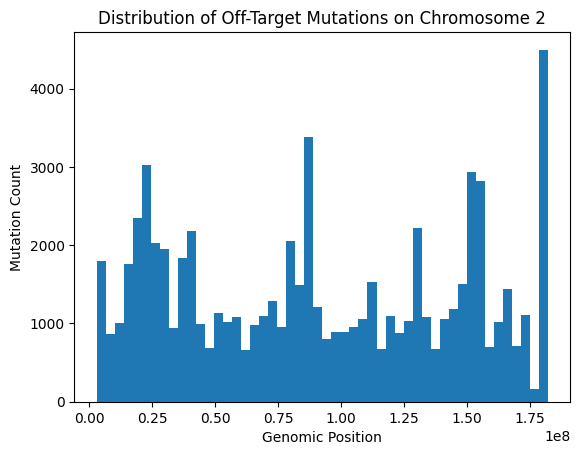

In [ ]:
import matplotlib.pyplot as plt

plt.hist(off_target_mutations_df['POS'], bins=50)
plt.xlabel('Genomic Position')
plt.ylabel('Mutation Count')
plt.title('Distribution of Off-Target Mutations on Chromosome 2')
plt.show()

In [ ]:
off_target_mutations_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,chr2,3051590,NaN,T,C,52.203800,NaN,1
1,chr2,3051604,NaN,A,C,45.253502,NaN,1
2,chr2,3051621,NaN,T,C,47.249500,NaN,1
3,chr2,3051632,NaN,A,G,55.332600,NaN,1
4,chr2,3051635,NaN,A,G,59.256699,NaN,1
...,...,...,...,...,...,...,...,...
70678,chr2,182002062,NaN,A,T,30.957300,NaN,1
70679,chr2,182002065,NaN,G,A,40.932098,NaN,3
70680,chr2,182002067,NaN,G,A,40.932098,NaN,3
70681,chr2,182002068,NaN,A,T,30.957300,NaN,1


In [ ]:
off_target_summary_df = off_target_mutations_df.groupby('CHROM').agg(
    mutation_count=('POS', 'count'),
    genotype_counts=('GENOTYPE', 'value_counts')
)
off_target_summary_df

,mutation_count,genotype_counts
chr2,70674.0,NaN
"(chr2, 1)",NaN,44866.0
"(chr2, 3)",NaN,25808.0
